/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


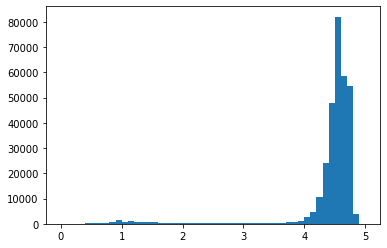

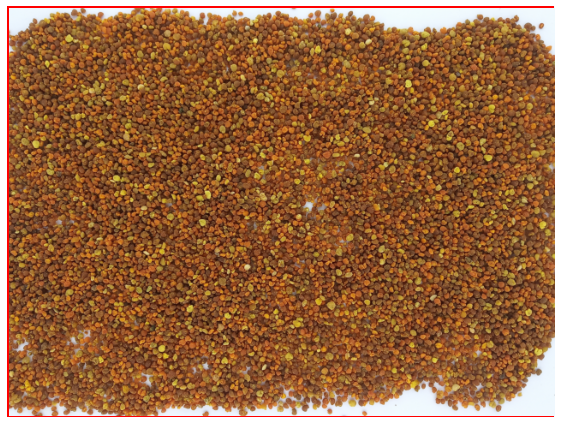

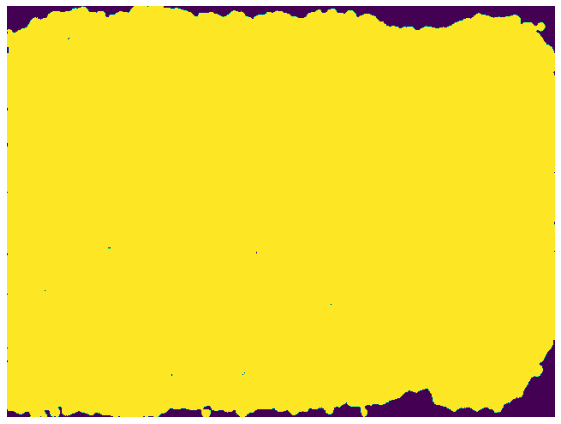

In [75]:
# Authors: Francisco Gómez and Juan David Leal
# Date: 2/02/2022
# Last modification Date: 2/02/2022


%matplotlib inline

import matplotlib.pyplot as plt
from skimage import io

import numpy as np
from skimage.filters import threshold_otsu
import cv2
from skimage.color import label2rgb
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches
from skimage.transform import rescale, resize, downscale_local_mean


###########################################################
#Part percentage of the image will be taken off
p=0.1

#standar size
Ancho=800
Alto=600
# Read the image
# Work!!
# can be put any image of the excel in the github
ima0 = io.imread("https://github.com/JuanDavid1703/PolenProject/raw/main/Images/Group/1/0101150102.jpg")

#img = io.imread("data/0112100102.jpg", as_gray=True)
# Scale to cope with large images
img= resize(ima0, (Alto, Ancho),order=1)
#img = rescale(img, 0.2, anti_aliasing=False)

#Diabling the reference colors and the lines of the image
i=int(p*Alto)
ima=[]
while i < (1-p)*Alto:
  j = int(p*Ancho)
  while j < (1-p)*Ancho:
      r, g, b = img[i, j,:]
      ima.append([r,g,b])
      j+=1
  i+=1

ancho=int((1-2*p)*Ancho)
alto=int((1-2*p)*Alto)
img=np.reshape(ima,(alto,ancho,3))

#Computes entropy to quantifies disorder.
# TODO: STUDY SIZE OF THE MASK
entropy_img = entropy(img[:,:,0], disk(3))

# Compute the histogram of the entropy image
plt.hist(entropy_img.flat, bins=50, range=(0,5));  #.flat returns the flattened numpy array (1D)
# Computes the threshold using Otsu method
thresh = threshold_otsu(entropy_img)

# Binarize the entropy image 
binary = entropy_img <= thresh+0.5

# TODO: POLEN CAN OVERLAP LINES MORPHOLOGICAL OPERATORS MAY HELP OR SOME COLOR INFORMATION

# Compute conected components in the binary image
label_image = label(binary,background=True)
fig, ax = plt.subplots(figsize=(10, 6))
image_label_overlay = label2rgb(label_image, image=binary)

ax.imshow(img)

# Extract the contected component with the largest area
maskRegion = np.full_like(label_image,0)
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 80000:
        # draw rectangle around segmented regions
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        # Computes the mask
        maskRegion[region.coords[:,0],region.coords[:,1]] = 1

ax.set_axis_off()
plt.tight_layout()
plt.show()


# Plot the mask
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_axis_off()
plt.tight_layout()
plt.imshow(maskRegion)


getting the images next to crop the reference color and the lines

(-0.5, 639.5, 479.5, -0.5)

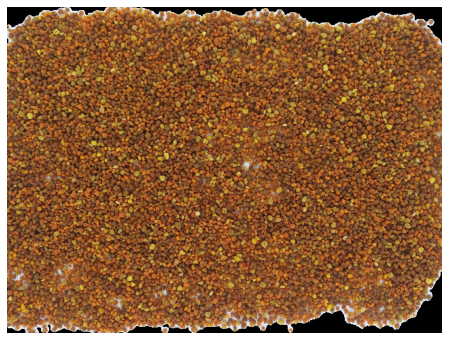

In [76]:
crop_image=np.zeros((alto,ancho,3))
i=0
while i < alto:
  j = 0
  while j < ancho:
    if maskRegion[i,j]==1:
     crop_image[i,j,:] = img[i, j,:]
    j+=1
  i+=1

plt.figure(figsize=(10,6))
plt.imshow(crop_image)
plt.axis("off")
